In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import datetime
from pandas.api.types import CategoricalDtype
import seaborn as sns

## Loading datasets

In [5]:
# Setting working directory
import os
os.chdir('/Users/mac/Documents/')

In [6]:
jan_2021_tripdata = pd.read_csv('data/202101-divvy-tripdata.csv')
feb_2021_tripdata = pd.read_csv('data/202102-divvy-tripdata.csv')
mar_2021_tripdata = pd.read_csv('data/202103-divvy-tripdata.csv')
apr_2021_tripdata = pd.read_csv('data/202104-divvy-tripdata.csv')
mei_2021_tripdata = pd.read_csv('data/202105-divvy-tripdata.csv')
jun_2021_tripdata = pd.read_csv('data/202106-divvy-tripdata.csv')
jul_2021_tripdata = pd.read_csv('data/202107-divvy-tripdata.csv')
ags_2021_tripdata = pd.read_csv('data/202108-divvy-tripdata.csv')
sep_2021_tripdata = pd.read_csv('data/202109-divvy-tripdata.csv')
oct_2021_tripdata = pd.read_csv('data/202110-divvy-tripdata.csv')
nov_2021_tripdata = pd.read_csv('data/202111-divvy-tripdata.csv')
des_2021_tripdata = pd.read_csv('data/202112-divvy-tripdata.csv')

# Data Exploration

### Mari kita mulai dengan melihat beberapa kumpulan data kita:

In [7]:
jan_2021_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [8]:
jul_2021_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


#### Seperti yang bisa kita lihat, kumpulan data berisi kolom yang sama. Karena ada 12 dataset, kita harus menggabungkannya menjadi satu saja. Ini akan membuat lebih mudah untuk membersihkan data, melakukan transformasi, dan melakukan analisis.

#### In order to do this, we will use the concat() function. You can think of it as Python's version of a SQL UNION.

In [9]:
tripdata = pd.concat([jan_2021_tripdata,feb_2021_tripdata,mar_2021_tripdata,apr_2021_tripdata,mei_2021_tripdata,jun_2021_tripdata,
                     jul_2021_tripdata,ags_2021_tripdata,sep_2021_tripdata,oct_2021_tripdata,nov_2021_tripdata,des_2021_tripdata])

### Checking the data types in the dataset

In [10]:
tripdata.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

#### Langkah selanjutnya pelajari lebih lanjut tentang beberapa karakteristik dataset kita, sehingga kita dapat memahami kontennya dengan lebih baik.

### How many unique rides are there in total?

In [12]:
tripdata.ride_id.nunique()

5595063

### How many types of bikes are there?

In [13]:
tripdata.rideable_type.nunique()

3

### How many rows and columns are there in the dataframe?


In [14]:
tripdata.shape

(5595063, 13)

# Cleaning Data


### Checking for empty cells

In [15]:
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

### Kami memang memiliki nilai null dalam dataset kami. Mari kita lihat berapa banyak dari mereka yang kita hadapi:

In [16]:
tripdata.isnull().values.sum()

2869497

##### Seperti yang dapat kita lihat di atas, ada nilai null di kolom berikut: start_station_name , start_station_id, end_station_name, end_station_id, end_lat, dan end_lng.

###### Mengingat bahwa kami tidak akan menggunakan kolom tersebut dalam analisis kami, tidak perlu khawatir tentang menghapus nilai null. Kita bisa melanjutkan dan drop kolom sama sekali.

### Dropping Unnecessary Columns

In [17]:
to_drop = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

tripdata.drop(to_drop, inplace=True, axis=1)

In [18]:
#### Hasil akhir akan seperti ini:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual


### Looking for duplicate values

In [19]:
tripdata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
247535    False
247536    False
247537    False
247538    False
247539    False
Length: 5595063, dtype: bool

##### No duplicate rows found.

## 4. ANALYZE

##### Sekarang, kita akan melakukan transformasi data dan mengubah format data untuk melakukan analisis.

### Data Transformation

##### In this next step, we will transform certain aspects of the data in order to analyze them.

### Changing data formatting
+ When using dtypes, we learned that some of our columns are of type object. We need to change the data type from columns started_at and ended_at to datetime to perform calculations.

In [20]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])

tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

### Creating an hour column

In [21]:
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour':'int8'})

### Creating a day of the week column

In [22]:
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()

### Creating a month column

In [24]:
tripdata['month'] = tripdata['started_at'].dt.month_name()

### Creating a ride length column
+ This column will show us the ride length in minutes for each ride.

In [25]:
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')

### Removing outliers
+ Now, we will check for any rows with zero or negative values in the ride_length column and remove them.

In [26]:
tripdata[tripdata['ride_length'] <= 0].count()

ride_id          85233
rideable_type    85233
started_at       85233
ended_at         85233
member_casual    85233
hour             85233
dayofweek        85233
month            85233
ride_length      85233
dtype: int64

In [27]:
# removing rows with zero or negative values
tripdata = tripdata.drop(tripdata[tripdata.ride_length <= 0].index)

+ Our dataset is ready to be analyzed.

In [28]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,dayofweek,month,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,16,Saturday,January,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,18,Wednesday,January,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,22,Thursday,January,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,13,Thursday,January,11
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,member,19,Sunday,January,7


# Trip Data
+ Kami sekarang akan melihat lebih dekat pada informasi yang lebih spesifik seputar dataframe  kami. Karena tugas bisnis kami adalah untuk mengetahui bagaimana pengendara biasa dan anggota menggunakan sepeda sepeda secara berbeda, kami akan memfilter data dan membuat beberapa tabel pivot untuk membandingkan angka dari dua jenis pelanggan.

### Rides by Customer Type

In [30]:
df = tripdata.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,2253518
member,2704917


### Average Ride Length

In [31]:
arl = tripdata.groupby('member_casual', as_index=True)[['ride_length']].mean()
arl

,ride_length
member_casual,
casual,31.989880
member,13.374976


### The Most Popular Rideable Type

In [33]:
rt_pivot = pd.pivot_table(tripdata, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1132186
              member         1749427
docked_bike   casual          279266
              member               1
electric_bike casual          842066
              member          955489
total count                  4958435

### The Most Popular Day of the Week for Bike Rentals


In [34]:
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          324783
            member          393383
Monday      casual          254783
            member          367107
Saturday    casual          497111
            member          381726
Sunday      casual          428463
            member          331783
Thursday    casual          255309
            member          398649
Tuesday     casual          244402
            member          410751
Wednesday   casual          248667
            member          421518
total count                4958435

### The Most Popular Month for Bike Rentals

In [35]:
pm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          118424
            member          174186
August      casual          371068
            member          353245
December    casual           59819
            member          151659
February    casual            7915
            member           30942
January     casual           14821
            member           64460
July        casual          400496
            member          340957
June        casual          332318
            member          320933
March       casual           71768
            member          123006
May         casual          227405
            member          242174
November    casual           93438
            member          219485
October     casual          228909
            member          333101
September   casual          327137
            member          350769
total count                4958435

### Average Ride Length by Day of the Week
+ Mari kita lihat berapa lama perjalanan berlangsung – dalam hitungan menit – berdasarkan hari dalam seminggu.

In [36]:
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          30.568361
                       member          13.062303
Monday                 casual          31.755667
                       member          12.962297
Saturday               casual          34.725405
                       member          15.064986
Sunday                 casual          37.649372
                       member          15.444345
Thursday               casual          27.646961
                       member          12.503011
Tuesday                casual          27.874702
                       member          12.500366
Wednesday              casual          27.369884
                       member          12.543813
total ride_length mean                 21.835109

### Average Ride Length by Month
+ Mari kita periksa juga panjang perjalanan rata-rata – dalam hitungan menit – per bulan.

In [37]:
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          38.223029
                       member          14.400491
August                 casual          28.728362
                       member          13.827661
December               casual          22.907120
                       member          10.667999
February               casual          52.732028
                       member          18.124620
January                casual          25.559746
                       member          12.458594
July                   casual          32.830850
                       member          14.007737
June                   casual          37.348154
                       member          14.460467
March                  casual          38.086459
                       member          13.687056
May                    casual          37.765049
                       member          14.407996
November               casual          23.265213
                       member          11.008283
October                casual          28.962116
                       member          12.235925
September              casual          27.669178
                       member          13.461372
total ride_length mean                 21.835109

### Total Number of Rides per Hour

In [38]:
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           48024
                    member           29296
1                   casual           34935
                    member           19330
2                   casual           22825
                    member           11018
3                   casual           12599
                    member            6346
4                   casual            8804
                    member            7205
5                   casual           11195
                    member           26497
6                   casual           23034
                    member           72114
7                   casual           41701
                    member          132074
8                   casual           56850
                    member          152810
9                   casual           67868
                    member          115483
10                  casual           93266
                    member          113901
11                  casual          121111
                    member          136940
12                  casual          144306
                    member          159257
13                  casual          154112
                    member          156692
14                  casual          158888
                    member          153514
15                  casual          167747
                    member          176734
16                  casual          182643
                    member          226872
17                  casual          210913
                    member          282788
18                  casual          190890
                    member          239820
19                  casual          148432
                    member          172083
20                  casual          109047
                    member          116407
21                  casual           92623
                    member           86114
22                  casual           85659
                    member           65928
23                  casual           66046
                    member           45694
total ride_id count                4958435

## 5. SHARE
+ Kami sekarang akan memvisualisasikan informasi yang telah kami temukan melalui analisis kami.

### Visualizing Rides by User Type


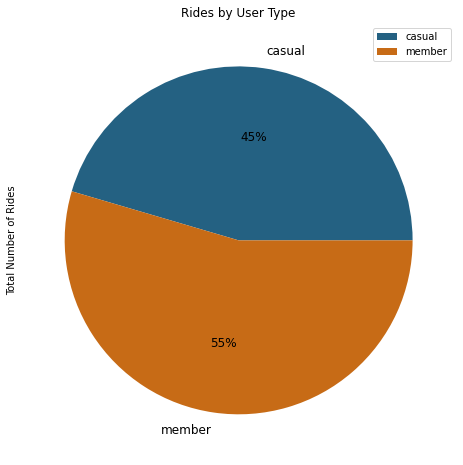

In [39]:
df['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

###### Bagan pai ini menunjukkan kepada kita bahwa members tahunan mewakili mayoritas pengguna sistem berbagi sepeda Cyclistic, yang merupakan 55% dari total pengguna.

### Visualizing Average Ride Length

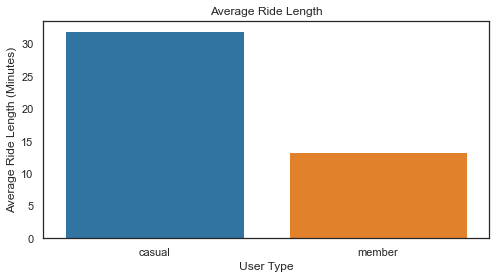

In [41]:
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

+ Bagan kolom di atas menunjukkan kepada kita bahwa pengendara biasa memiliki rata-rata panjang perjalanan yang jauh lebih besar daripada members. Panjang perjalanan rata-rata adalah 34 menit untuk pengendara biasa dan 14 menit untuk anggota.

#### Visualizing the Most Popular Rideable Type

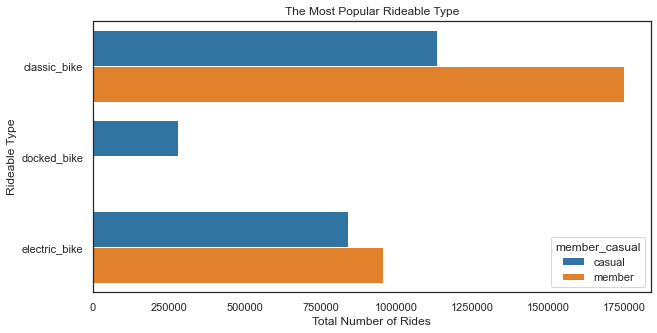

In [42]:
df2 = tripdata[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

+ Menurut dataset kami, sepeda Cyclistic dibagi menjadi tiga kelompok: sepeda klasik, sepeda berlabuh, dan sepeda listrik. Terlihat jelas dalam visualisasi bahwa docked bike merupakan tipe rideable yang paling banyak disewa baik oleh casual rider maupun member. Ini dapat dijelaskan oleh pengguna yang menunjukkan preferensi untuk tipe berlabuh atau, lebih masuk akal, perusahaan telah berinvestasi lebih banyak dalam sistem berbasis berlabuh daripada dua opsi lainnya.

### Visualizing the Most Popular Day of the Week for Bike Rentals

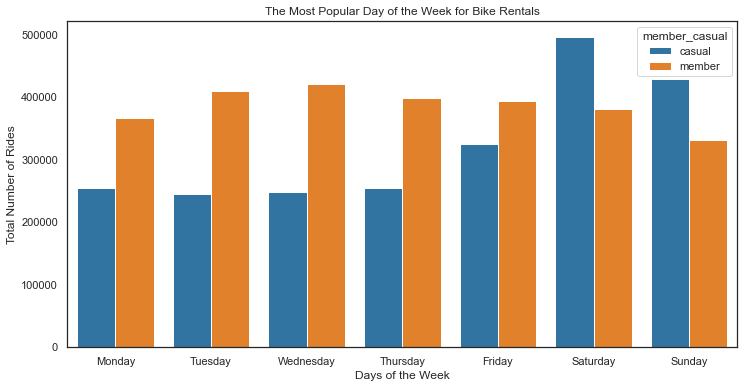

In [44]:
df3 = tripdata[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

+ Dalam hal persewaan sepeda pada hari dalam seminggu, ada persamaan dan perbedaan antara pengendara biasa dan anggota. Misalnya, Sabtu adalah hari paling populer untuk kedua jenis pengguna, dan pada hari Minggu jumlah perjalanan mereka hampir sama. Di sisi lain, kedua kelompok berbeda jauh dalam hal persewaan sepeda sepanjang hari kerja: anggota secara konsisten menyewa sepeda setiap hari sementara pengendara biasa menunjukkan jumlah hari kerja yang lebih rendah dibandingkan dengan akhir pekan.

### Visualizing the Most Popular Month of the Year for Bike Rentals

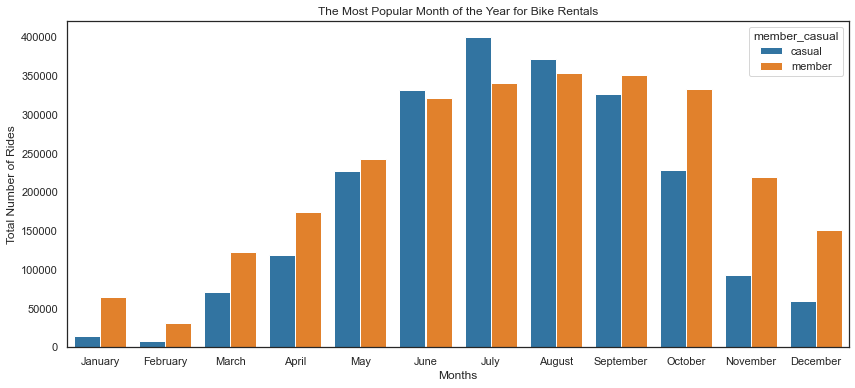

In [45]:
df4 = tripdata[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=df4, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

+ Memvisualisasikan jumlah perjalanan per bulan dapat membantu kita mengetahui apakah musim berperan dalam persewaan sepeda. Bagan di atas menunjukkan kepada kita bahwa jumlah persewaan meningkat selama bulan-bulan musim panas dan secara bertahap turun selama musim gugur dan musim dingin untuk kedua jenis pengguna tersebut. Perbedaan utamanya adalah anggota masih lebih konsisten dengan kebiasaan sewa mereka sepanjang tahun jika dibandingkan dengan pengendara biasa, yang jumlahnya turun secara signifikan selama bulan-bulan musim dingin.

### Visualizing Average Ride Length by Day of the Week

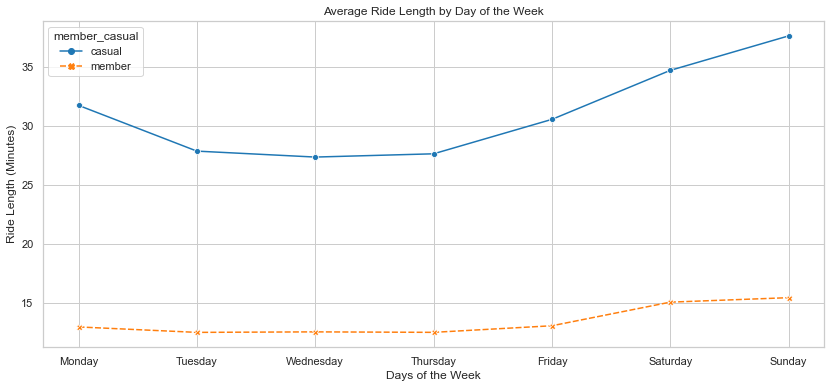

In [46]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

+ Pada plot garis ini, terlihat jelas bahwa panjang perjalanan bertambah pada akhir pekan untuk kedua grup. Perbedaan antara pengendara biasa dan members dalam skenario ini terletak pada durasi perjalanan. Pengendara kasual cenderung menempuh perjalanan lebih lama, rata-rata 33 menit. Sebaliknya, anggota memberikan perjalanan yang jauh lebih pendek yang rata-rata berlangsung13 menit.

+ Mempertimbangkan kurangnya data pengguna pribadi untuk alasan privasi, sulit bagi kami untuk menentukan dengan tepat apa yang menyebabkan pengendara biasa dan anggota memiliki jarak tempuh yang berbeda. Kemungkinan members tinggal dekat dengan tempat kerja

### Visualizing Average Ride Length by Month

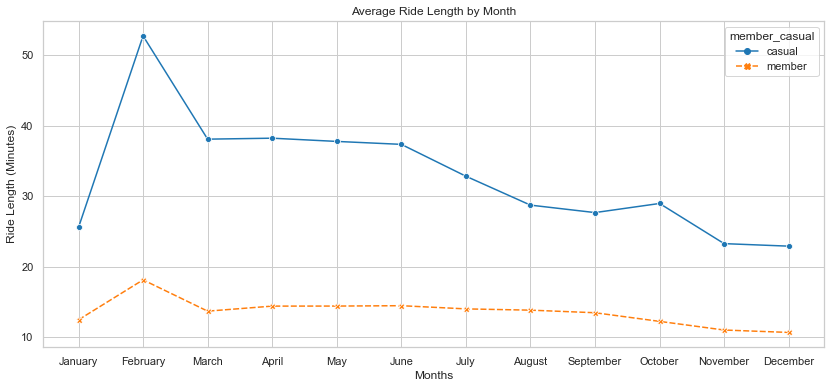

In [48]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

+ Saat kami memvisualisasikan panjang perjalanan per bulan, kami dapat mempelajari lebih lanjut tentang kebiasaan berkendara pengguna sepanjang tahun. Perhatikan bahwa panjang perjalanan sangat berubah untuk pengendara biasa seiring berlalunya waktu. Untuk jenis pelanggan ini, panjang perjalanan mencapai puncaknya selama musim panas – mencapai rata-rata 55 menit di bulan Ferbruari – sebelum turun di bulan Maret. Sedangkan untuk anggota, lama perjalanan tidak berubah secara drastis selama beberapa bulan, memuncak pada bulan Ferbruari pula – rata-rata 18 menit – dan kemudian secara bertahap menurun selama sisa tahun tersebut.

+ Mempertimbangkan perjalanan singkat, ini dapat menunjukkan bahwa anggota menggunakan sepeda Cyclistic untuk bepergian dan, mungkin, menjalankan tugas. Penurunan panjang perjalanan selama bulan-bulan musim dingin dapat menunjukkan bahwa para anggota memilih alat transportasi lain untuk bepergian selama musim tersebut. Sebaliknya, pengendara biasa dapat menggunakannya untuk rekreasi atau pariwisata – seperti yang disebutkan sebelumnya – terutama selama musim semi dan musim panas.

### Visualizing the Total Number of Rides per Hour

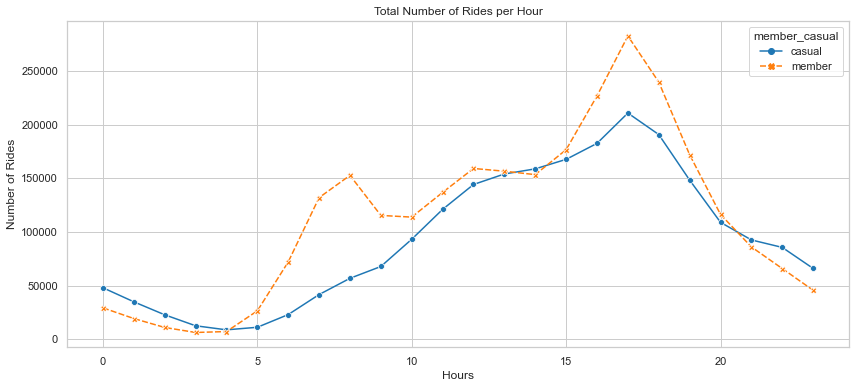

In [49]:
df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

+ Dengan melihat lebih dekat jumlah perjalanan per jam, kita dapat menemukan lebih banyak pola dalam kebiasaan penyewaan sepeda pelanggan. Jumlah persewaan sepeda oleh pengendara biasa mulai meningkat antara pukul 08.00 hingga 10.00 dan memuncak pada pukul 17.00. Sedangkan untuk anggota, angkanya mulai naik lebih awal – antara pukul 6 pagi dan 7 pagi – juga memuncak pada pukul 5 sore. Perhatikan bahwa jumlah perjalanan oleh anggota jauh lebih banyak daripada pengendara biasa. Hal ini mungkin terkait dengan fakta bahwa anggota mewakili mayoritas pengguna dan kemungkinan besar menggunakan layanan Cyclistic untuk perjalanan sehari-hari mereka.

## 6. ACT

### Pin Point

+ Anggota tahunan adalah mayoritas pengguna, yang merupakan 59% dari pelanggan Cyclistic.
+ Pengendara kasual memiliki waktu perjalanan rata-rata 44 menit sementara anggota melakukan perjalanan lebih pendek, rata-rata 16 menit.
+ Docked bike adalah jenis rideable paling populer untuk kedua grup, diikuti oleh sepeda klasik dan elektrik.
+ Sabtu adalah hari paling populer dalam seminggu untuk persewaan sepeda.
+ Pengendara kasual, serta anggota, melakukan perjalanan lebih lama di akhir pekan.
+ Anggota secara konsisten menyewa sepeda setiap hari sementara pengendara biasa menyajikan jumlah hari kerja yang lebih rendah dibandingkan akhir pekan.
+ Agustus adalah bulan paling populer dalam setahun untuk persewaan sepeda. Ada peningkatan yang jelas dalam jumlah selama musim panas untuk pengendara biasa dan anggota.
+ Kedua tipe pengguna ini membutuhkan perjalanan yang lebih lama selama bulan-bulan musim semi dan musim panas.
+ Jumlah persewaan sepeda oleh pengendara biasa mulai bertambah antara pukul 08.00 hingga 10.00 dan memuncak pada pukul 17.00. Sedangkan untuk anggota, angkanya mulai naik lebih awal – antara pukul 6 pagi dan 7 pagi – juga memuncak pada pukul 5 sore.
+ Rata-rata lama perjalanan yang digabungkan dengan rata-rata waktu sewa harian menunjukkan bahwa anggota menggunakan sepeda untuk pergi bekerja/sekolah. Penurunan panjang perjalanan yang mencolok selama musim dingin dapat dikaitkan dengan perubahan alat transportasi untuk bepergian selama musim tersebut.
+ Jumlah persewaan sepeda pengendara biasa pada akhir pekan dipasangkan dengan panjang perjalanan rata-rata selama musim panas menunjukkan bahwa mereka menggunakan tiket sekali jalan dan satu hari penuh untuk rekreasi atau pariwisata.

#### Setelah melakukan analisis dengan dukungan visualisasi, menjadi jelas bagaimana pengendara sepeda biasa dan anggota menggunakan sepeda berbeda:

+ Pengendara kasual cenderung menyewa lebih banyak sepeda di akhir pekan – terutama selama musim panas. Mempertimbangkan panjang perjalanan rata-rata, kombinasi faktor ini menunjukkan bahwa kelompok pelanggan ini menggunakan sepeda untuk bersantai. 
+ Members cenderung menggunakan sistem berbagi-sepeda Cyclistic setiap hari untuk perjalanan yang lebih singkat, yang menunjukkan kegunaannya untuk perjalanan ke tempat kerja

### Recommendations
+ Rekomendasi berikut dibuat dengan hati-hati untuk membantu memandu strategi pemasaran Cyclistic: 
    + Tingkatkan kampanye pemasaran yang ditargetkan pada pengendara biasa melalui email, pesan teks, dan pemberitahuan aplikasi selama bulan-bulan musim panas, ketika persewaan sepeda lebih sering terjadi. 
    + Iklan tersebut dapat menawarkan diskon khusus untuk keanggotaan tahunan guna mendorong pengendara biasa untuk beralih. 
    + Buat sistem poin hadiah untuk members, di mana setiap persewaan sepeda menambahkan sejumlah poin ke akun pengguna. Poin bisa bertambah dengan frekuensi sewa dan durasi perjalanan, dan pada setiap akhir tahun, pengguna dapat menukarkan poin dengan diskon perpanjangan keanggotaan. 
    + Cyclistic dapat belajar bermitra dengan perusahaan lokal dan menawarkan penawaran khusus di tempat-tempat seperti pusat kebugaran, bioskop, salon kecantikan, dan restoran. Berfokus pada segmen hiburan dan kesehatan dapat memotivasi pengendara kasual untuk mendaftar keanggotaan tahunan. Mengingat pengendara biasa tidak menyewa sepeda sebanyak anggota selama hari kerja, tim pemasaran Cyclistic juga harus mempertimbangkan kemungkinan untuk membuat dua jenis keanggotaan baru: Keanggotaan tahunan yang hanya mencakup akhir pekan. 
    + Dengan cara ini, pelanggan yang hanya menyewa sepeda dua kali seminggu dapat membayar sesuai dan tetap menambah jumlah anggota perusahaan yang terus bertambah. Keanggotaan musiman yang disesuaikan untuk sekelompok orang yang suka mengendarai sepeda selama musim panas, tetapi tidak tertarik untuk menyewanya selama sisa tahun ini. Keanggotaan jenis ini dapat ditagih setiap tahun, dan menawarkan diskon khusus dibandingkan dengan tiket satu perjalanan dan satu hari penuh. Pertimbangan Tambahan